In [120]:
library(limma)

In [131]:
dat.biochem <- read.csv('data/TGGATES/cel/rat/biochem.csv')
rownames(dat.biochem) <- dat.biochem[,1]
dat.biochem[,1] <- NULL
dim(dat.biochem)

[1] 7054   19

In [133]:
meta <- read.csv('data/TGGATES/cel/rat/meta.csv')
rownames(meta) <- meta[,1]
meta[,1] <- NULL
dim(meta)

[1] 2459   69

In [134]:
meta

,BARCODE,ARR_DESIGN,EXP_ID,GROUP_ID,INDIVIDUAL_ID,ORGAN_ID,MATERIAL_ID,COMPOUND_NAME,COMPOUND.Abbr.,COMPOUND_NO,...,A.G,AST.IU.L.,ALT.IU.L.,LDH.IU.L.,GTP.IU.L.,DNA...,LDH...,CEL,combn,HOURS
"combnLiver.2,4-dinitrophenol.0.3 hr",3017864020,Rat230_2,672,1,1,Liver,A,"2,4-dinitrophenol",DNP,154,...,2.50,69,38,83,0.0,NA,NA,003017864020.CEL,"Liver.2,4-dinitrophenol.0.3 hr",3
combnLiver.2-nitrofluorene.0.24 hr,3017911030,Rat230_2,712,1,2,Liver,A,2-nitrofluorene,2NF,160,...,1.10,69,48,132,0.7,NA,NA,003017911030.CEL,Liver.2-nitrofluorene.0.24 hr,24
combnLiver.2-nitrofluorene.100.24 hr,3017912003,Rat230_2,712,2,2,Liver,A,2-nitrofluorene,2NF,160,...,1.07,79,29,199,0.5,NA,NA,003017912003.CEL,Liver.2-nitrofluorene.100.24 hr,24
combnLiver.2-nitrofluorene.1000.24 hr,3017912009,Rat230_2,712,4,1,Liver,A,2-nitrofluorene,2NF,160,...,1.19,67,25,243,0.8,NA,NA,003017912009.CEL,Liver.2-nitrofluorene.1000.24 hr,24
combnLiver.2-nitrofluorene.300.24 hr,3017912006,Rat230_2,712,3,3,Liver,A,2-nitrofluorene,2NF,160,...,1.18,88,29,222,0.7,NA,NA,003017912006.CEL,Liver.2-nitrofluorene.300.24 hr,24
"combnLiver.2,4-dinitrophenol.0.24 hr",3017865026,Rat230_2,672,4,1,Liver,A,"2,4-dinitrophenol",DNP,154,...,2.90,76,42,85,0.0,NA,NA,003017865026.CEL,"Liver.2,4-dinitrophenol.0.24 hr",24
"combnLiver.2,4-dinitrophenol.0.6 hr",3017865002,Rat230_2,672,2,1,Liver,A,"2,4-dinitrophenol",DNP,154,...,2.80,63,43,125,0.0,NA,NA,003017865002.CEL,"Liver.2,4-dinitrophenol.0.6 hr",6
"combnLiver.2,4-dinitrophenol.0.9 hr",3017865014,Rat230_2,672,3,1,Liver,A,"2,4-dinitrophenol",DNP,154,...,2.60,63,30,85,1.0,NA,NA,003017865014.CEL,"Liver.2,4-dinitrophenol.0.9 hr",9
"combnLiver.2,4-dinitrophenol.20.24 hr",3017866002,Rat230_2,672,12,3,Liver,A,"2,4-dinitrophenol",DNP,154,...,2.70,74,52,110,1.0,NA,NA,003017866002.CEL,"Liver.2,4-dinitrophenol.20.24 hr",24
"combnLiver.2,4-dinitrophenol.20.3 hr",3017864026,Rat230_2,672,9,1,Liver,A,"2,4-dinitrophenol",DNP,154,...,2.20,62,39,106,0.0,NA,NA,003017864026.CEL,"Liver.2,4-dinitrophenol.20.3 hr",3


In [123]:
dat.merged <- merge(meta,dat.biochem,suffixes=c('',''))
dim(dat.merged)

[1] 87344    38

In [46]:
biochem.all <- dat.merged[,88:118]

In [47]:
meta <- meta[!apply(is.na(biochem.all),1,any),]

In [48]:
biochem.all <- biochem.all[!apply(is.na(biochem.all),1,any),]

In [49]:
pca <- princomp(biochem.all,cor=TRUE)

In [50]:
biochem.pca <- data.frame(predict(pca,biochem.all)[,1:2])
biochem.pca$COMPOUND_NAME <- factor(meta$COMPOUND_NAME)
biochem.pca$SACRI_PERIOD <- factor(meta$SACRI_PERIOD)
biochem.pca$DOSE <- meta$DOSE

In [51]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [52]:
pca.names <- colnames(biochem.pca)[1:2]

In [53]:
biochem.names <- names(dat.biochem)[88:118]

In [54]:
library(Hotelling)

Warning message:
“package ‘Hotelling’ was built under R version 3.6.1”Loading required package: corpcor
Warning message:
“package ‘corpcor’ was built under R version 3.6.1”

In [60]:
sigma <- cov(biochem.pca[,1:2])
sigma.inv <- solve(sigma)

t2.tests <- do.call(rbind,lapply(split(biochem.pca,factor(meta$COMPOUND_NAME)),function(dat.cpd){
    do.call(rbind,lapply(split(dat.cpd,factor(dat.cpd$SACRI_PERIOD)),function(dat.cpd.tp){
        dat.cpd.tp.dose.0 <- subset(dat.cpd.tp,DOSE==0)
        mat.cpd.tp.dose.0 <- dat.cpd.tp.dose.0[,pca.names]
        mean.cpd.tp.dose.0 <- apply(mat.cpd.tp.dose.0,2,mean)
        do.call(rbind,lapply(split(dat.cpd.tp,factor(dat.cpd.tp$DOSE)),function(dat.cpd.tp.dose){
            mat.cpd.tp.dose <- dat.cpd.tp.dose[,pca.names]
            mean.cpd.tp.dose <- apply(mat.cpd.tp.dose,2,mean)
            ht <- hotelling.test(mat.cpd.tp.dose,mat.cpd.tp.dose.0)
            data.frame(
                COMPOUND_NAME= dat.cpd.tp.dose$COMPOUND_NAME[1],
                SACRI_PERIOD=dat.cpd.tp.dose$SACRI_PERIOD[1],
                DOSE=dat.cpd.tp.dose$DOSE[1],
                stat=ht$stats$statistic*ht$stats$m,
                distance=mahalanobis(mean.cpd.tp.dose,mean.cpd.tp.dose.0,cov=sigma),
                pval=ht$pval
            )
        }))
    }))
}))

In [62]:
t2.tests$SACRI_PERIOD <- factor(t2.tests$SACRI_PERIOD,levels=levels(t2.tests$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(t2.tests$SACRI_PERIOD))))])

t2.tests$sig <- ''
t2.tests$sig[t2.tests$pval<=.1] <- '*'
t2.tests$sig[t2.tests$pval<=.05] <- '**'
t2.tests$sig[t2.tests$pval<=.01] <- '***'

In [65]:
levels(t2.tests$COMPOUND_NAME)

[1] "acarbose"          "acetamidofluorene" "acetaminophen"

In [63]:
subset(t2.tests,COMPOUND_NAME=='colchicine')

COMPOUND_NAME,SACRI_PERIOD,DOSE,stat,distance,pval,sig


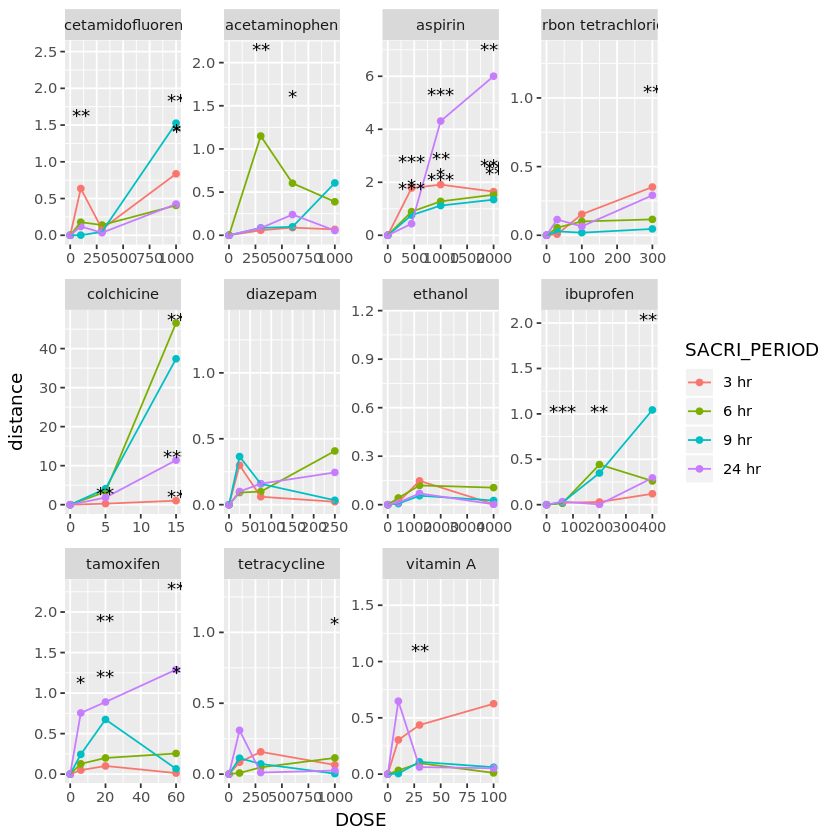

In [225]:
ggplot(t2.tests) +
geom_point(aes(DOSE,distance,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_line(aes(DOSE,distance,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_text(aes(DOSE,distance,label=sig)) +
facet_wrap('COMPOUND_NAME',scales='free')

# Re-plot using NN-derived PCs

In [246]:
dat.pred.pca <- read.csv('data/TGGATES/cel/rat/pred.pca.csv')
dat.pred.pca$SACRI_PERIOD <- factor(dat.pred.pca$SACRI_PERIOD,levels=levels(dat.pred.pca$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(dat.pred.pca$SACRI_PERIOD))))])

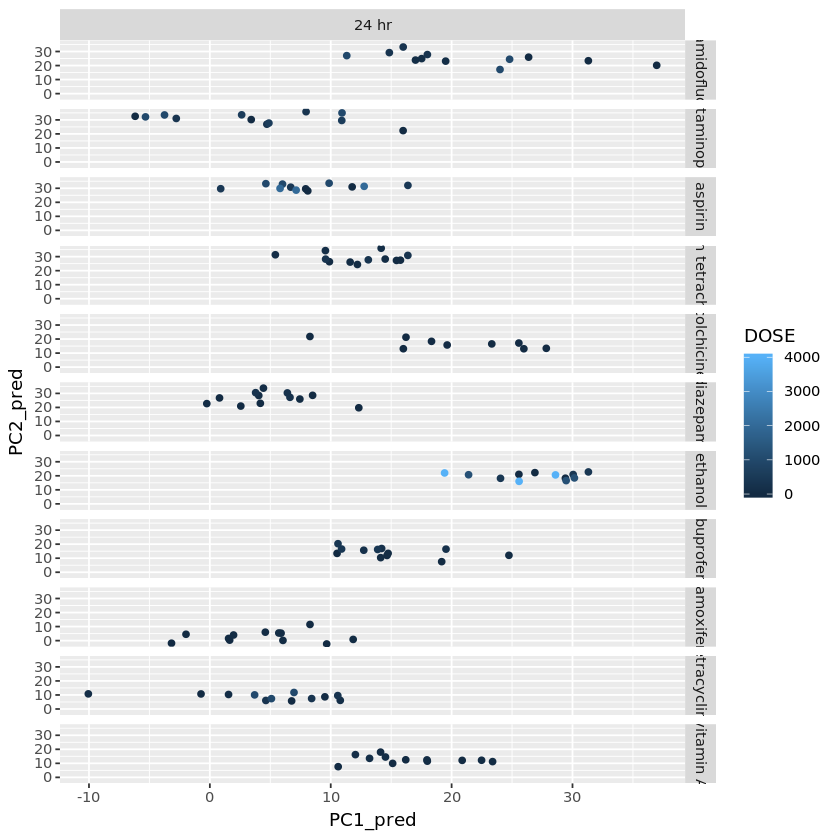

In [247]:
ggplot(dat.pred.pca) +
geom_point(aes(PC1_pred,PC2_pred,color=DOSE)) +
facet_grid(COMPOUND_NAME~SACRI_PERIOD)

In [248]:
pca.names <- c('PC1_pred','PC2_pred')

In [249]:
sigma <- cov(dat.pred.pca[,pca.names])
sigma.inv <- solve(sigma)

t2.tests <- do.call(rbind,lapply(split(dat.pred.pca,factor(dat.pred.pca$COMPOUND_NAME)),function(dat.cpd){
    do.call(rbind,lapply(split(dat.cpd,factor(dat.cpd$SACRI_PERIOD)),function(dat.cpd.tp){
        dat.cpd.tp.dose.0 <- subset(dat.cpd.tp,DOSE==0)
        mat.cpd.tp.dose.0 <- dat.cpd.tp.dose.0[,pca.names]
        mean.cpd.tp.dose.0 <- apply(mat.cpd.tp.dose.0,2,mean)
        do.call(rbind,lapply(split(dat.cpd.tp,factor(dat.cpd.tp$DOSE)),function(dat.cpd.tp.dose){
            mat.cpd.tp.dose <- dat.cpd.tp.dose[,pca.names]
            mean.cpd.tp.dose <- apply(mat.cpd.tp.dose,2,mean)
            ht <- hotelling.test(mat.cpd.tp.dose,mat.cpd.tp.dose.0)
            data.frame(
                COMPOUND_NAME= dat.cpd.tp.dose$COMPOUND_NAME[1],
                SACRI_PERIOD=dat.cpd.tp.dose$SACRI_PERIOD[1],
                DOSE=dat.cpd.tp.dose$DOSE[1],
                stat=ht$stats$statistic*ht$stats$m,
                distance=mahalanobis(mean.cpd.tp.dose,mean.cpd.tp.dose.0,cov=sigma),
                pval=ht$pval
            )
        }))
    }))
}))

In [250]:
t2.tests$SACRI_PERIOD <- factor(t2.tests$SACRI_PERIOD,levels=levels(meta$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(meta$SACRI_PERIOD))))])

t2.tests$sig <- ''
t2.tests$sig[t2.tests$pval<=.1] <- '*'
t2.tests$sig[t2.tests$pval<=.05] <- '**'
t2.tests$sig[t2.tests$pval<=.01] <- '***'

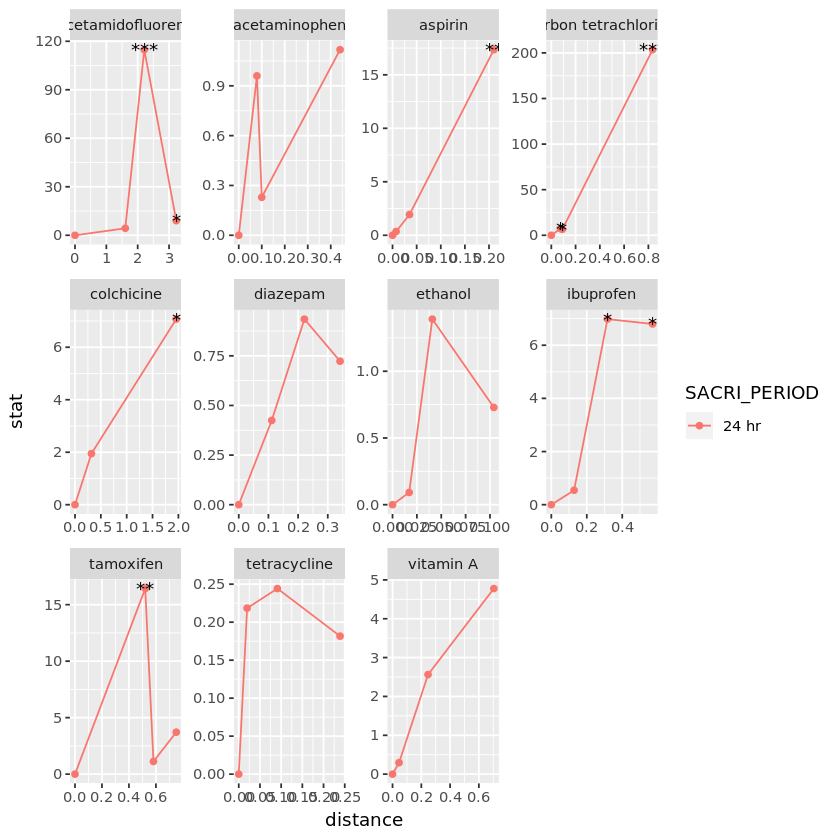

In [251]:
ggplot(t2.tests) +
geom_point(aes(distance,stat,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_line(aes(distance,stat,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_text(aes(distance,stat,label=sig)) +
facet_wrap('COMPOUND_NAME',scales='free')